In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw

font = {'family': 'serif',
        'color':  'red',
        'weight': 'bold',
        'size': 8
        }

box = {'facecolor': 'none',
       'edgecolor': 'green',
       'boxstyle': 'round'
      }


In [2]:
dataDir='/home/zhanjun/PHD/datasets/automine-2d/images'
dataType='test2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [3]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


In [4]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))
nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
Wide-Body-Truck Mining-Truck Pushdozer Civilian-Vehicles Excavator/top Excavator/bottom Trailer Tractor water_car Track bus Pedestrian

COCO supercategories: 
None


imgIds: 362 ,AnnIds [] imgpath:test2017/000159.png
imgIds: 553 ,AnnIds [] imgpath:test2017/000150.png
imgIds: 707 ,AnnIds [] imgpath:test2017/000472.png
imgIds: 919 ,AnnIds [] imgpath:test2017/000519.png
catIds [0] imgcount 130 randint 125
{0: 'Wide-Body-Truck', 1: 'Mining-Truck', 2: 'Pushdozer', 3: 'Civilian-Vehicles', 4: 'Excavator/top', 5: 'Excavator/bottom', 6: 'Trailer', 7: 'Tractor', 8: 'water_car', 9: 'Track', 10: 'bus', 11: 'Pedestrian'}
imginfo {'file_name': '000779.png', 'height': 1536, 'width': 2048, 'date_captured': '2023-12-15', 'id': 480, 'license': 1, 'color_url': '', 'flickr_url': ''}
bbox (363.28289023495006, 776.2336116657274, 467, 862) cat Civilian-Vehicles
bbox (526.4247987761726, 772.8769358694371, 551, 860) cat Pedestrian
bbox (485.5474386022047, 774.350185219776, 513, 851) cat Pedestrian
bbox (574.3946615394179, 774.8091931819913, 607, 849) cat Pedestrian
[{'id': 4800000, 'image_id': 480, 'category_id': 3, 'iscrowd': 0, 'area': 9010.166421196916, 'bbox': [363.282

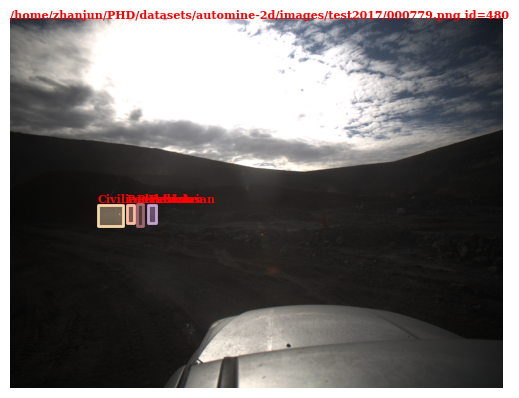

In [5]:
# get all images containing given categories, select one at random

catNames = {cat['id']:cat['name'] for cat in cats}
catIds = coco.getCatIds(catNms=['Wide-Body-Truck']);
imgIds = coco.getImgIds(catIds=3);

allIds = coco.getImgIds();

for ids in allIds:    
    checkAnnIds = coco.getAnnIds(imgIds=ids, iscrowd=None)
    anns = coco.loadAnns(checkAnnIds)
    if len(anns) == 0:
        checkimg = coco.loadImgs(ids)[0]
        print("imgIds:",ids,",AnnIds",checkAnnIds,"imgpath:%s/%s" % (dataType,checkimg['file_name']))

x = np.random.randint(0,len(imgIds))
print("catIds",catIds,"imgcount",len(imgIds),"randint",x)
print(catNames)
img = coco.loadImgs(imgIds[x])[0]
print("imginfo",img)
# load and display image
imgPath = '%s/%s/%s' % (dataDir,dataType,img['file_name'])
I = io.imread(imgPath)
drawImg = Image.open(imgPath).convert('RGB')
draw = ImageDraw.Draw(drawImg)
    # use url to load image
#I = io.imread(img['coco_url'])
# plt.axis('off')
# plt.imshow(I)
# plt.show()
# load and display instance annotations

fig, ax = plt.subplots()
ax.imshow(I); 
ax.axis('off')

#, catIds=catIds,
annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None)
anns = coco.loadAnns(annIds)

ax.text(0,0, imgPath+" id=%s" % img['id'],fontdict=font) #, bbox=box)
    
##一个图片可能会含有多个锚框，对每一个都进行描绘
for object in anns:
    x, y, w, h = object["bbox"]
    x1, y1, x2, y2 = x, y, int(x + w), int(y + h)
    cat = catNames[object["category_id"]]
    print("bbox",(x1, y1, x2, y2),"cat",cat)
    rect = patches.Rectangle((x1, y1), w, h, linewidth=1,
                         edgecolor='r', facecolor="none")
    ax.add_patch(rect)
    ax.text(x1, y1-10, cat,fontdict=font) #, bbox=box)
    draw.rectangle((x1, y1, x2, y2))
    draw.text((x1, y1), cat)

if anns:
    print(anns)
    coco.showAnns(anns)

In [6]:
#plt.imshow(drawImg)

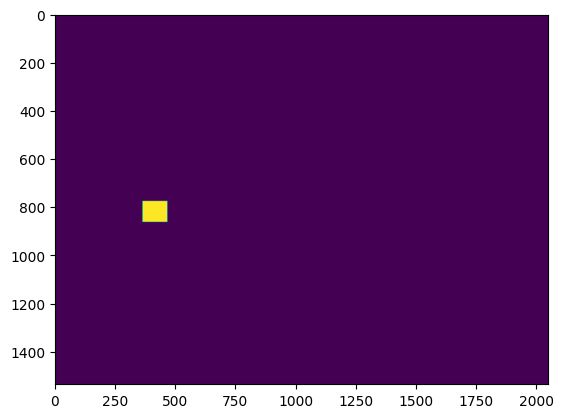

In [7]:
if anns:
    mask = coco.annToMask(anns[0])
    plt.imshow(mask);